<a href="https://colab.research.google.com/github/Lutambwe186/Odin-recipe/blob/main/image_classifier_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Classification Model 
Objective: The goal is to build a model that is able to differentiate between the Simpson characters (Bart, Lisa and Homer)

Dataset: The dataset consists of a total of 450 images separated in 3 different classes that each contain a set of 150 images. The three classes are: Bart, Lisa and Homer.

Model: A 3-clas, single-label classification model, which correctly classifies an image that it has never seen before in one of three classes.

In [ ]:
!pip install -q jmd_imagescraper
from jmd_imagescraper.imagecleaner import *
from pathlib import Path
from jmd_imagescraper.core import *

In [ ]:
path = Path().cwd()/"images"
number_images_to_download = 150

duckduckgo_search(path, "Bart", "bart simpson", max_results=number_images_to_download)
duckduckgo_search(path, "Lisa", "lisa simpson", max_results=number_images_to_download)
duckduckgo_search(path, "Homer", "homer simpson", max_results=number_images_to_download)

Duckduckgo search: bart simpson


Duckduckgo search: lisa simpson


Duckduckgo search: homer simpson


[Path('/content/images/Homer/038_fa47e745.jpg'),
 Path('/content/images/Homer/039_3f5dd0ca.jpg'),
 Path('/content/images/Homer/040_d9dc24bd.jpg'),
 Path('/content/images/Homer/041_af86ad45.jpg'),
 Path('/content/images/Homer/042_28ea3ee8.jpg'),
 Path('/content/images/Homer/043_8b058bdd.jpg'),
 Path('/content/images/Homer/044_78c11435.jpg'),
 Path('/content/images/Homer/045_87e42ef2.jpg'),
 Path('/content/images/Homer/046_2a761bde.jpg'),
 Path('/content/images/Homer/047_d7c2fc8b.jpg'),
 Path('/content/images/Homer/048_1b86d3ed.jpg'),
 Path('/content/images/Homer/049_b0548d3d.jpg'),
 Path('/content/images/Homer/050_8a98f5ab.jpg'),
 Path('/content/images/Homer/051_285f78ba.jpg'),
 Path('/content/images/Homer/052_cdc7ee0a.jpg'),
 Path('/content/images/Homer/053_c1dda5a9.jpg'),
 Path('/content/images/Homer/054_111ab787.jpg'),
 Path('/content/images/Homer/055_a7a2519e.jpg'),
 Path('/content/images/Homer/056_87580374.jpg'),
 Path('/content/images/Homer/057_53d38eef.jpg'),
 Path('/content/imag

In [ ]:
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [ ]:
clean_error_img(path)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/146 [00:00<?, ?it/s]

  0%|          | 0/150 [00:00<?, ?it/s]

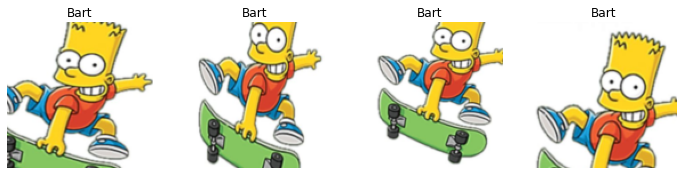

In [ ]:
Bart = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(128, min_scale=0.3)
)
dls = Bart.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

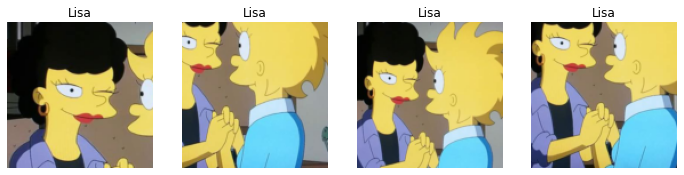

In [ ]:
lisa = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(128, min_scale=0.3)
)
dls = lisa.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

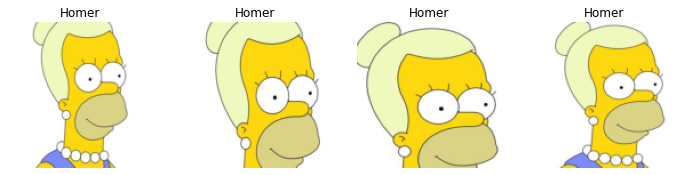

In [ ]:
homer = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(128, min_scale=0.3)
)
dls = homer.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(5)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,1.916106,0.903439,0.629214,00:28


epoch,train_loss,valid_loss,accuracy,time
0,0.921726,0.267159,0.887640,00:36
1,0.790426,0.046195,0.988764,00:35
2,0.644598,0.030961,0.988764,00:35
3,0.544097,0.024852,1.000000,00:35
4,0.454695,0.028535,1.000000,00:35


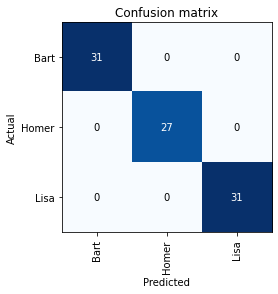

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

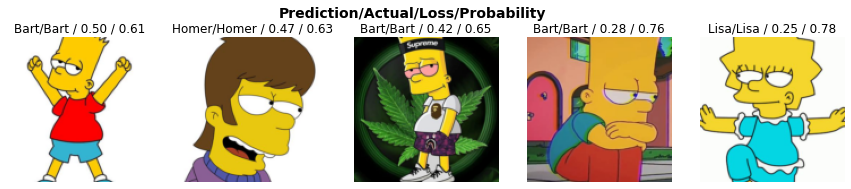

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

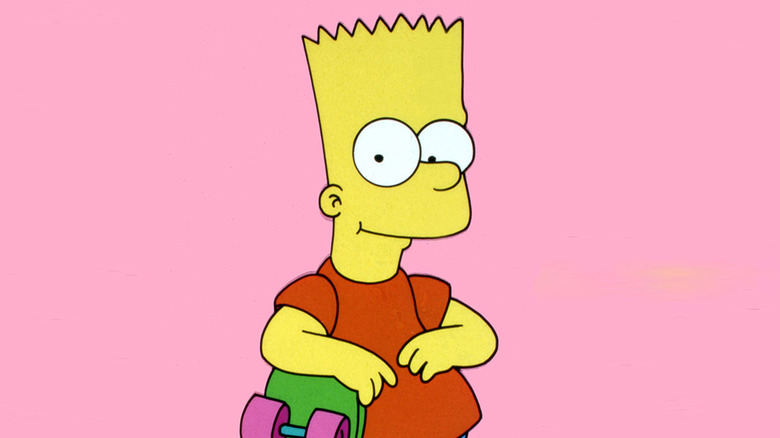

In [ ]:
img = PILImage.create(uploader.data[0])
img

In [ ]:
pred, pred_idx, probs = learn.predict(img)
print(f"This is a {pred}")
print(f"Probability: {probs[pred_idx]:.04f}")

This is a Bart
Probability: 0.9999
